# TODOS

* Numeric data (temperature, snow, wind, distance):
    * Convert to same unit
    * Impute missing values
    * Standardize/normalize
* For categorical data:
    * Encode appropriately
    * Composites -> if no 4 then take average and treat as new category, 4 trumps all
* Age of circles - older circles are more numerous
* Any outliers for these

See data dictionary: http://www.audubon.org/sites/default/files/documents/cbc_report_field_definitions_2013.pdf

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

/Users/dunmireg/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
raw_data = pd.read_csv("cbc_effort.csv")

In [20]:
raw_data = raw_data.drop(raw_data[raw_data["circle_name"].str.contains("do not")].index)

In [3]:
raw_data.shape

(73558, 30)

In [4]:
raw_data.head().T

0        1        2        3        4
circle_name                 Adak     Adak     Adak     Adak     Adak
country_state              US-AK    US-AK    US-AK    US-AK    US-AK
lat                      51.8833  51.8833  51.8833  51.8833  51.8833
lon                      -176.65  -176.65  -176.65  -176.65  -176.65
count_year                  1968     1969     1970     1971     1973
n_field_counters               2        3        3        4        4
n_feeder_counters            NaN      NaN      NaN      NaN      NaN
min_field_count_parties      NaN      NaN      NaN      NaN      NaN
max_field_count_parties      NaN      NaN      NaN      NaN      NaN
field_hours                    9        8        9        8        8
feeder_hours                 NaN      NaN      NaN      NaN      NaN
nocturl_hours                NaN      NaN      NaN      NaN      NaN
field_distance                35       35       35       33       33
nocturnal_distance           NaN      NaN      NaN      NaN      NaN
distance_units             Miles    Miles    Miles    Miles    Miles
min_temp                      38       40       30       31      NaN
max_temp                      41       43       35       38      NaN
temp_unit                    NaN      NaN      NaN      NaN      NaN
min_wind                      17        0       12       25      NaN
max_wind                      23        0       18       46      NaN
wind_unit                    NaN      NaN      NaN      NaN      NaN
min_snow                       0        0        0        0      NaN
max_snow                       0        0        0        0      NaN
snow_unit                    NaN      NaN      NaN      NaN      NaN
am_cloud                       2        3        6        6      NaN
pm_cloud                       2        2        2        2      NaN
am_rain                        2        4        4        3      NaN
pm_rain                        2        4        3        3      NaN
am_snow                        2        4        4        3      NaN
pm_snow                        2        4        2        2      NaN

Trying to predict n_field_counters (feeder is different)

In [5]:
raw_data.describe(include = 'all')

circle_name country_state           lat           lon    count_year  \
count         73558         73558  73558.000000  73558.000000  73558.000000   
unique         2537            55           NaN           NaN           NaN   
top     Springfield         US-CA           NaN           NaN           NaN   
freq            201          5119           NaN           NaN           NaN   
mean            NaN           NaN     39.429701    -93.396898   1995.743318   
std             NaN           NaN      5.938967     17.785463     14.685175   
min             NaN           NaN     19.433300   -177.380631   1966.000000   
25%             NaN           NaN     35.714551   -103.864184   1984.000000   
50%             NaN           NaN     40.116700    -89.404762   1997.000000   
75%             NaN           NaN     42.983308    -80.566700   2009.000000   
max             NaN           NaN     71.333300    179.284881   2018.000000   

        n_field_counters  n_feeder_counters  min_field_count_parties  \
count       73401.000000       41819.000000             46326.000000   
unique               NaN                NaN                      NaN   
top                  NaN                NaN                      NaN   
freq                 NaN                NaN                      NaN   
mean           23.534591           3.811282                 8.397682   
std            21.914766           9.932000                 7.454819   
min             0.000000           0.000000                 0.000000   
25%            10.000000           0.000000                 4.000000   
50%            18.000000           1.000000                 7.000000   
75%            29.000000           4.000000                10.000000   
max           501.000000         866.000000               150.000000   

        max_field_count_parties   field_hours   ...        wind_unit  \
count               46918.00000  72942.000000   ...     46900.000000   
unique                      NaN           NaN   ...              NaN   
top                         NaN           NaN   ...              NaN   
freq                        NaN           NaN   ...              NaN   
mean                   10.10448     65.346295   ...         0.986951   
std                     8.98979     57.155580   ...         0.172158   
min                     0.00000      0.000000   ...         0.000000   
25%                     5.00000     31.500000   ...         1.000000   
50%                     8.00000     51.250000   ...         1.000000   
75%                    12.00000     82.000000   ...         1.000000   
max                   322.00000   4407.000000   ...         3.000000   

            min_snow      max_snow     snow_unit      am_cloud      pm_cloud  \
count   61677.000000  61817.000000  44099.000000  65931.000000  65889.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        1.413307      3.277340      2.006077      2.973139      3.244532   
std         4.307580      8.028987      0.110081      2.007817      2.135298   
min         0.000000      0.000000      2.000000      1.000000      1.000000   
25%         0.000000      0.000000      2.000000      1.000000      1.000000   
50%         0.000000      0.000000      2.000000      2.000000      2.000000   
75%         1.000000      4.000000      2.000000      5.000000      6.000000   
max       555.000000    800.000000      4.000000      7.000000      7.000000   

        am_rain  pm_rain  am_snow  pm_snow  
count     65516    65455    65359    65321  
unique       13       11       13       12  
top           3        3        3        3  
freq      33659    34424    35681    36130  
mean        NaN      NaN      NaN      NaN  
std         NaN      NaN      NaN      NaN  
min         NaN      NaN      NaN      NaN  
25%     

In [12]:
#What percentage are null
pd.DataFrame((raw_data.isnull().sum())/len(raw_data) * 100).sort_values(by = 0, ascending = False)

0
n_feeder_counters        43.148264
snow_unit                40.048669
nocturnal_distance       38.139971
min_field_count_parties  37.021126
temp_unit                36.240790
wind_unit                36.240790
max_field_count_parties  36.216319
nocturl_hours            31.643057
feeder_hours             29.953234
min_snow                 16.151880
max_snow                 15.961554
min_wind                 12.358955
max_wind                 12.295060
pm_snow                  11.197966
am_snow                  11.146306
pm_rain                  11.015797
am_rain                  10.932869
pm_cloud                 10.425786
am_cloud                 10.368689
max_temp                 10.341499
min_temp                 10.336061
field_hours               0.837434
field_distance            0.811604
distance_units            0.269175
n_field_counters          0.213437
country_state             0.000000
count_year                0.000000
lon                       0.000000
lat                       0.000000
circle_name               0.000000

In [10]:
data = pd.DataFrame()

In [6]:
#What type are the different variables
raw_data.dtypes.sort_values()

count_year                   int64
field_distance             float64
snow_unit                  float64
max_snow                   float64
min_snow                   float64
wind_unit                  float64
max_wind                   float64
min_wind                   float64
temp_unit                  float64
max_temp                   float64
min_temp                   float64
nocturnal_distance         float64
pm_cloud                   float64
nocturl_hours              float64
feeder_hours               float64
field_hours                float64
max_field_count_parties    float64
min_field_count_parties    float64
n_feeder_counters          float64
n_field_counters           float64
lon                        float64
lat                        float64
am_cloud                   float64
am_rain                     object
pm_rain                     object
circle_name                 object
distance_units              object
country_state               object
am_snow             

0.2107180728132902

__N Field Counters__

In [22]:
raw_data['n_field_counters'].describe()

count    73398.000000
mean        23.534694
std         21.914939
min          0.000000
25%         10.000000
50%         18.000000
75%         29.000000
max        501.000000
Name: n_field_counters, dtype: float64

In [23]:
(raw_data['n_field_counters'].isnull().sum()) / len(raw_data) * 100

0.2120890774125133

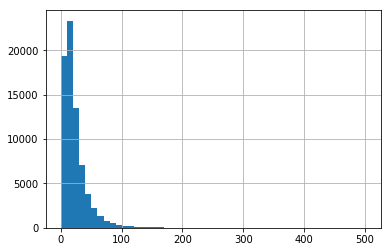

In [24]:
raw_data['n_field_counters'].hist(bins = 50);

In [25]:
raw_data.loc[raw_data['n_field_counters'] < 100].shape[0] / len(raw_data)

0.983508714685809

__Count Year__

In [7]:
raw_data['count_year'].describe()

count    73558.000000
mean      1995.743318
std         14.685175
min       1966.000000
25%       1984.000000
50%       1997.000000
75%       2009.000000
max       2018.000000
Name: count_year, dtype: float64

In [9]:
(raw_data['count_year'].isnull().sum())/len(raw_data) * 100

0.0

__NB__: There is a circle name that is NY - do not use, exclude those observations

# Examine numeric values

field_distance             float64
snow_unit                  float64
max_snow                   float64
min_snow                   float64
wind_unit                  float64
max_wind                   float64
min_wind                   float64
temp_unit                  float64
max_temp                   float64
min_temp                   float64
nocturnal_distance         float64
pm_cloud                   float64
nocturl_hours              float64
feeder_hours               float64
field_hours                float64
max_field_count_parties    float64
min_field_count_parties    float64
n_feeder_counters          float64
n_field_counters           float64
lon                        float64
lat                        float64
am_cloud                   float64

### Snow

In [26]:
#Variables of interest: snow_unit, max_snow, min_snow
raw_data['snow_unit'].value_counts()

2.0    43962
4.0      134
Name: snow_unit, dtype: int64

In [13]:
raw_data.loc[raw_data["snow_unit"] == 2.0, "max_snow"].head()

22    0.0
23    3.0
24    0.0
25    2.0
26    6.0
Name: max_snow, dtype: float64

In [12]:
raw_data.loc[raw_data["snow_unit"] == 4.0, "max_snow"].head()

639       0.0
1071    100.0
1072     50.0
1073     60.0
1076     60.0
Name: max_snow, dtype: float64

In [27]:
#Clearly 4.0 means something different? For now set to Nan
raw_data.loc[raw_data["snow_unit"] == 4.0, ["min_snow", "max_snow"]] = np.NaN

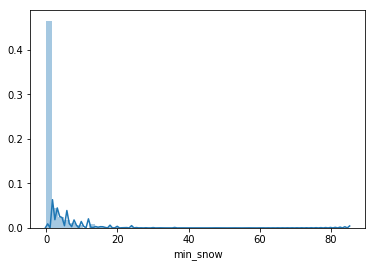

In [30]:
#Examine distribution - is mean or median better for this
sns.distplot(raw_data.loc[raw_data["min_snow"].isnull() == False]["min_snow"]);

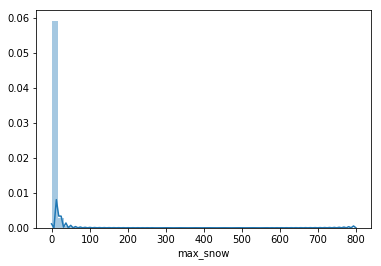

In [29]:
sns.distplot(raw_data.loc[raw_data["max_snow"].isnull() == False]["max_snow"]);

In [31]:
#Contains outliers so we will replace with 0 assuming no snow happened if it wasn't recorded
raw_data["min_snow"] = raw_data["min_snow"].fillna(0)
raw_data["max_snow"] = raw_data["max_snow"].fillna(0)

In [32]:
#Graph against time
#seaborn lineplot not integrated into latest version of conda
plt.plot(raw_data["count_year"], raw_data["min_snow"]);

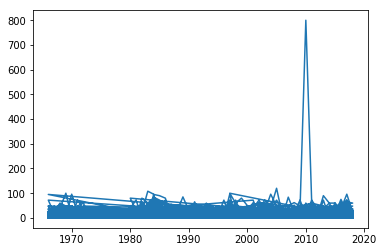

In [33]:
plt.plot(raw_data["count_year"], raw_data["max_snow"]);

In [53]:
raw_data["min_snow"].describe()

count    73558.000000
mean         1.182041
std          3.968637
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        555.000000
Name: min_snow, dtype: float64

In [35]:
#There are clearly some outliers, how many are there? 
len(raw_data[raw_data["min_snow"] > (raw_data["min_snow"].mean() + 3 * raw_data["min_snow"].std())])

1996

In [36]:
len(raw_data[raw_data["max_snow"] > (raw_data["max_snow"].mean() + 3 * raw_data["max_snow"].std())])

1768

In [37]:
temp = raw_data.loc[raw_data["max_snow"] < (raw_data["max_snow"].mean() + 3 * raw_data["max_snow"].std()), :]
plt.scatter(temp["count_year"], temp["max_snow"]);

In [ ]:
#Very little relationship with time

In [38]:
#Create average snow variable
raw_data["average_snow"] = (raw_data["max_snow"] + raw_data["min_snow"]) / 2

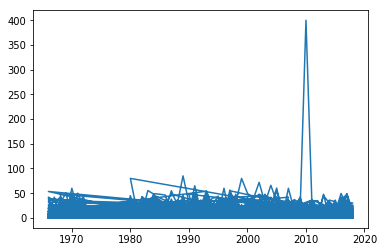

In [39]:
plt.plot(raw_data["count_year"], raw_data["average_snow"])

In [48]:
raw_data[raw_data['average_snow'] > 150]

circle_name country_state        lat         lon  count_year  \
6697   Mono Lake         US-CA  37.956057 -119.120139        2010   

      n_field_counters  n_feeder_counters  min_field_count_parties  \
6697              14.0                1.0                      1.0   

      max_field_count_parties  field_hours      ...       max_snow  snow_unit  \
6697                      9.0         54.5      ...          800.0        2.0   

      am_cloud  pm_cloud am_rain  pm_rain  am_snow  pm_snow  average_wind  \
6697       3.0       6.0       3        3        3        3           3.0   

      average_snow  
6697         400.0  

[1 rows x 32 columns]

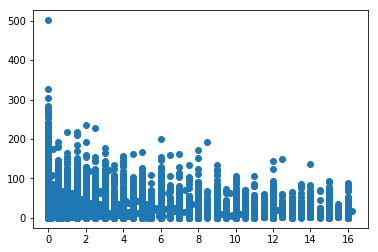

In [40]:
temp = raw_data.loc[raw_data["average_snow"] < (raw_data["average_snow"].mean() + 3 * raw_data["average_snow"].std()), :]
plt.scatter(temp["average_snow"], temp["n_field_counters"]);

### Wind

In [72]:
raw_data["wind_unit"].value_counts()

1.0    45895
0.0      874
3.0      131
Name: wind_unit, dtype: int64

In [73]:
raw_data["min_wind"].isnull().sum()

9091

In [74]:
raw_data["max_wind"].isnull().sum()

9044

In [77]:
raw_data["min_wind"].describe()

count    64467.000000
mean         4.091247
std          5.510043
min        -16.000000
25%          0.000000
50%          3.000000
75%          5.000000
max        454.000000
Name: min_wind, dtype: float64

In [78]:
raw_data["max_wind"].describe()

count    64514.000000
mean        12.228969
std         10.045787
min          0.000000
25%          5.000000
50%         10.000000
75%         15.000000
max        777.000000
Name: max_wind, dtype: float64

In [4]:
#How many outliers
def GetBounds(ser):
    lower = ser.mean() - 3 * ser.std()
    upper = ser.mean() + 3 * ser.std()
    return (lower, upper)

In [7]:
bounds = GetBounds(raw_data["min_wind"])
len(raw_data[(raw_data["min_wind"] < bounds[0]) | (raw_data["min_wind"] > bounds[1])])

619

In [8]:
bounds = GetBounds(raw_data["max_wind"])
len(raw_data[(raw_data["max_wind"] < bounds[0]) | (raw_data["max_wind"] > bounds[1])])

610

In [10]:
raw_data['min_wind'] = raw_data['min_wind'].fillna(0)
raw_data['max_wind'] = raw_data['max_wind'].fillna(0)

In [11]:
raw_data['average_wind'] = (raw_data['min_wind'] + raw_data['max_wind'])/2

In [12]:
raw_data['average_wind'].describe()

count    73558.000000
mean         7.155511
std          7.148713
min          0.000000
25%          2.500000
50%          5.500000
75%         10.000000
max        615.500000
Name: average_wind, dtype: float64

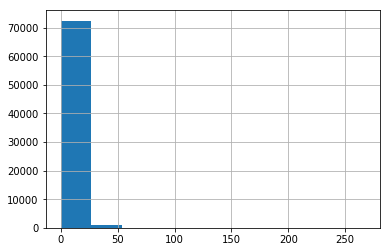

In [41]:
raw_data['average_wind'].hist()

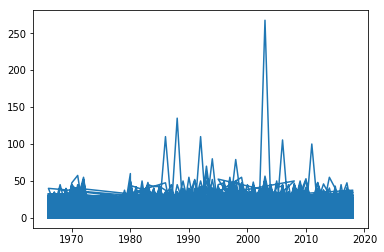

In [42]:
#Oddly similar to average snow
plt.plot(raw_data['count_year'], raw_data['average_wind'])

In [47]:
raw_data[raw_data["average_wind"] > 150]

circle_name country_state        lat         lon  count_year  \
57216   Spearfish         US-SD  44.519824 -103.864184        2003   

       n_field_counters  n_feeder_counters  min_field_count_parties  \
57216               7.0                0.0                      4.0   

       max_field_count_parties  field_hours      ...       max_snow  \
57216                      4.0         32.0      ...            0.0   

       snow_unit  am_cloud  pm_cloud am_rain  pm_rain  am_snow  pm_snow  \
57216        2.0       6.0       1.0       3        3        3        3   

       average_wind  average_snow  
57216         267.5           0.0  

[1 rows x 32 columns]

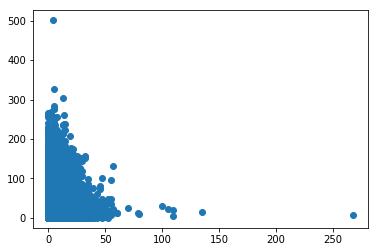

In [50]:
#Relationship with n field counters
plt.scatter(raw_data["average_wind"], raw_data["n_field_counters"]);

### Temperature

In [51]:
raw_data['temp_unit'].value_counts()

2.0    46757
1.0      140
Name: temp_unit, dtype: int64

In [58]:
raw_data[raw_data["temp_unit"] != 1.0][["min_temp", "max_temp"]].describe()

min_temp      max_temp
count  65812.000000  65808.000000
mean      27.256237     42.336973
std       23.642586     17.985054
min      -52.000000    -49.000000
25%       18.000000     31.000000
50%       28.000000     41.000000
75%       36.000000     54.000000
max     4464.000000    768.000000

In [63]:
#Believe that temperature unit = 1.0 is Celsius so convert

TODOS: 
* what does snow_unit stand for?
* What should we do with outliers for snow
* what is wind unit? direction?
* Suggestion: remove large outliers?
* What are temperature units